# Modularity and Simulated annealing

**Definition**

The modularity Q of a graph is defined as follows:

$$Q= \sum_{i=1}^{n_c} \left[ \frac{l_c}{m} - \left(\frac{d_c}{2m}\right)^2 \right]$$

where:
- $n_c$ is the number of clusters
- $l_c$ the total number of edges joining vertices of cluster $c$
- $d_c$ the sum of the degrees of the vertices of cluster $c$

**Importation of necessary libraries**


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from Utils import *
from simulated_annealing import *

Our real dataset

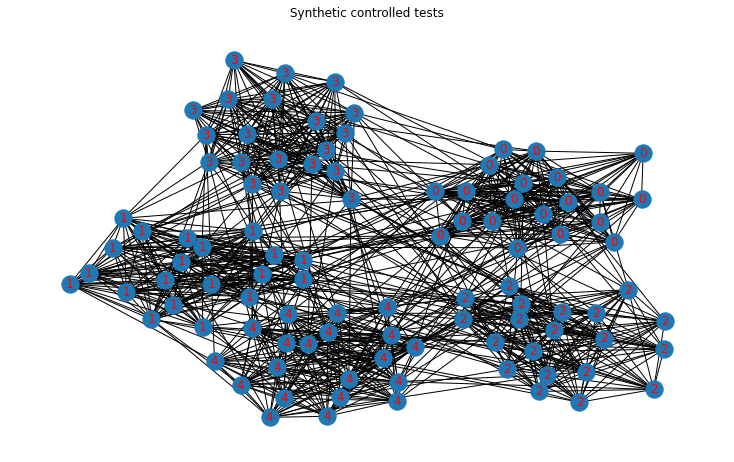

In [28]:
G = generate_known_cluster(100,5,0.7,0.1)
plot_graph_cluster(G,"Synthetic controlled tests")

Finding best parameters via a grid search

In [3]:
# Appliquer la recherche en grille
iterations = 5
temperature_range = np.arange(3, 7, 1)
cooling_rate_range = np.arange(0.01,0.2,0.02)
k = 5
best_params, best_score = grid_search(G, temperature_range, cooling_rate_range, iterations, k)

print("Meilleurs paramètres:", best_params)
print("Meilleur score de modularité:", best_score)

KeyboardInterrupt: 

In [21]:
k=5
iterations=3

temperature=6
cooling_rate=0.07
# temperature=best_params['temperature']
# cooling_rate=best_params['cooling_rate']

initial_partition = {node: random.randint(1,k) for node in G.nodes()}

final_partition, final_score, scores = simulated_annealing(G, initial_partition, temperature, cooling_rate, iterations)

print("Final Partition:", final_partition)
print("Final Modularity Score:", final_score)

Final Partition: {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 5, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 3, 55: 3, 56: 3, 57: 3, 58: 3, 59: 3, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 4, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 4, 98: 4, 99: 4}
Final Modularity Score: 0.6079349685564899


In [31]:
Good=[]
temperature_range = np.arange(3, 8, 1)
cooling_rate_range = np.arange(0.01,0.1,0.01)
for temperature in temperature_range:
    for cooling_rate in cooling_rate_range:
        good=0
        for _ in range(10):
            final_partition, final_score, scores = simulated_annealing(G, initial_partition, temperature, cooling_rate, iterations)
            S=set(final_partition.values())
            if len(S)==5:
                good+=1
        good=good/10
        Good.append((temperature,cooling_rate,good))

print(Good)

[(3, 0.01, 1.0), (3, 0.02, 1.0), (3, 0.03, 0.9), (3, 0.04, 0.4), (3, 0.05, 0.4), (3, 0.060000000000000005, 0.6), (3, 0.06999999999999999, 0.5), (3, 0.08, 0.5), (3, 0.09, 0.3), (4, 0.01, 1.0), (4, 0.02, 1.0), (4, 0.03, 1.0), (4, 0.04, 0.3), (4, 0.05, 0.5), (4, 0.060000000000000005, 0.3), (4, 0.06999999999999999, 0.4), (4, 0.08, 0.5), (4, 0.09, 0.4), (5, 0.01, 1.0), (5, 0.02, 1.0), (5, 0.03, 1.0), (5, 0.04, 0.4), (5, 0.05, 0.5), (5, 0.060000000000000005, 0.3), (5, 0.06999999999999999, 0.6), (5, 0.08, 0.6), (5, 0.09, 0.5), (6, 0.01, 1.0), (6, 0.02, 1.0), (6, 0.03, 1.0), (6, 0.04, 0.5), (6, 0.05, 0.5), (6, 0.060000000000000005, 0.5), (6, 0.06999999999999999, 0.3), (6, 0.08, 0.5), (6, 0.09, 0.3), (7, 0.01, 1.0), (7, 0.02, 1.0), (7, 0.03, 1.0), (7, 0.04, 0.8), (7, 0.05, 0.7), (7, 0.060000000000000005, 0.3), (7, 0.06999999999999999, 0.5), (7, 0.08, 0.5), (7, 0.09, 0.5)]


In [32]:
Gd=[(3, 0.01, 1.0), (3, 0.02, 1.0), (3, 0.03, 0.9), (3, 0.04, 0.4), (3, 0.05, 0.4), (3, 0.060000000000000005, 0.6), (3, 0.06999999999999999, 0.5), (3, 0.08, 0.5), (3, 0.09, 0.3), (4, 0.01, 1.0), (4, 0.02, 1.0), (4, 0.03, 1.0), (4, 0.04, 0.3), (4, 0.05, 0.5), (4, 0.060000000000000005, 0.3), (4, 0.06999999999999999, 0.4), (4, 0.08, 0.5), (4, 0.09, 0.4), (5, 0.01, 1.0), (5, 0.02, 1.0), (5, 0.03, 1.0), (5, 0.04, 0.4), (5, 0.05, 0.5), (5, 0.060000000000000005, 0.3), (5, 0.06999999999999999, 0.6), (5, 0.08, 0.6), (5, 0.09, 0.5), (6, 0.01, 1.0), (6, 0.02, 1.0), (6, 0.03, 1.0), (6, 0.04, 0.5), (6, 0.05, 0.5), (6, 0.060000000000000005, 0.5), (6, 0.06999999999999999, 0.3), (6, 0.08, 0.5), (6, 0.09, 0.3), (7, 0.01, 1.0), (7, 0.02, 1.0), (7, 0.03, 1.0), (7, 0.04, 0.8), (7, 0.05, 0.7), (7, 0.060000000000000005, 0.3), (7, 0.06999999999999999, 0.5), (7, 0.08, 0.5), (7, 0.09, 0.5)]
triplets_with_1_0 = [(temp, cool, val) for temp, cool, val in Gd if val == 1.0]

print(triplets_with_1_0)

[(3, 0.01, 1.0), (3, 0.02, 1.0), (4, 0.01, 1.0), (4, 0.02, 1.0), (4, 0.03, 1.0), (5, 0.01, 1.0), (5, 0.02, 1.0), (5, 0.03, 1.0), (6, 0.01, 1.0), (6, 0.02, 1.0), (6, 0.03, 1.0), (7, 0.01, 1.0), (7, 0.02, 1.0), (7, 0.03, 1.0)]


In [59]:
k=5
iterations=4

temperature=6
cooling_rate=0.03

initial_partition = {node: random.randint(1,k) for node in G.nodes()}

final_partition, final_score, scores = simulated_annealing(G, initial_partition, temperature, cooling_rate, iterations)
print("Final Modularity Score:", final_score)

Final Modularity Score: 0.5418113689964513


4


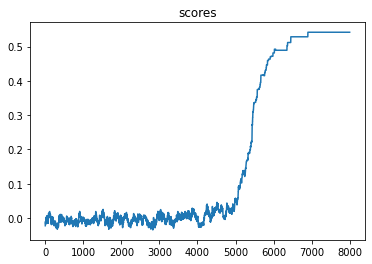

In [60]:
#See evolution of the scores
S=set(final_partition.values())
print(len(S))
plt.plot(scores)
plt.title("scores")
plt.show()

In [61]:
print(scores)
abs(scores[-1]-scores[-2])

[-0.022486279177411903, -0.01767682778990061, -0.01529634772642114, -0.012357777336948136, -0.01585002975600079, -0.010147457515043312, -0.012225528444532605, -0.014734289933655144, -0.018265335361149687, -0.018361877052613024, -0.01726288875664, -0.010464193612378478, -0.009160219533161387, -0.013551984835460343, -0.012172628887566414, -0.007805770460005752, -0.006163239216204883, -0.007497189711036155, -0.005055875157045562, -0.005415592144415797, -0.007249443452577737, -0.004952721020961465, -0.00156494522691707, -0.003782318323084056, 0.0027419603694152257, -0.0012449029072715036, -0.001923780555004511, -0.003929555423306651, -0.0022089973329806577, -0.0009870175670612276, 0.00019881416826467505, -0.0001450329520156883, -0.002274240119905648, -0.00021115739822344035, -0.0009543961735987046, -0.004489409067865702, -0.0035513235909982455, -0.001945822037073757, 0.00149044501752299, 0.0035314862571359344, 0.0012052282395468225, -0.0015204214331371556, -0.0023482994996583545, 0.0010716

0.0

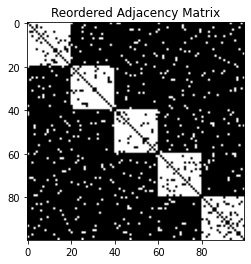

In [62]:
plot_adj(G,final_partition)

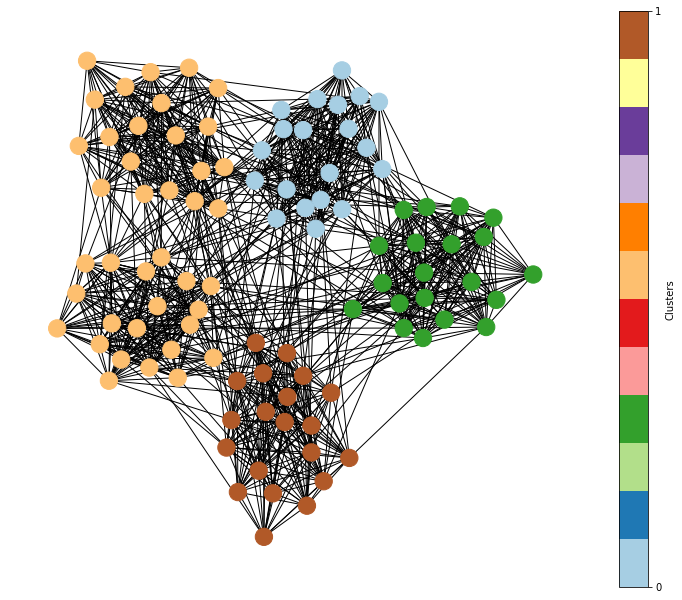

In [63]:
plot_graph(G,final_partition)

In [10]:
sens,spe=quality(nx.get_node_attributes(G,'spin'),final_partition)
print(sens,spe)

1.0 1.0


# Test on different graphs

In [11]:
krange=np.arange(0.1,1.1,0.1)
spe_list=[]
sens_list=[]

for kin in krange:
    G = generate_known_cluster(30,5,kin,0.1)
    temperature=6
    k=6
    cooling_rate=0.07
    iterations=40
    initial_partition = {node: random.randint(0,k) for node in G.nodes()}

    final_partition, final_score, scores = simulated_annealing(G, initial_partition, temperature, cooling_rate, iterations)

    sens,spe=quality(nx.get_node_attributes(G,'spin'),final_partition)
    spe_list.append(spe)
    sens_list.append(sens)

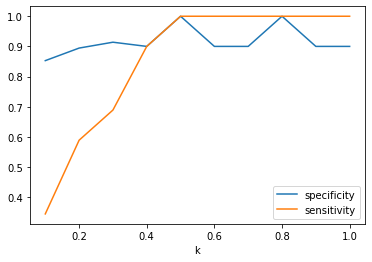

In [14]:
plt.plot(krange,spe_list,label='specificity')
plt.plot(krange,sens_list,label='sensitivity')
plt.xlabel("k")
plt.legend()
plt.show()

To do:
- montrer qq exemples de modularité, pour le graph initial et pour le graph clusteré
- montrer le pb de résolution limite